# Mini-Project 2

## Loading Libraries

In [29]:
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import graphviz as gv
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

## Loading Iris Dataset and Splitting into Training and Test Sets

In [30]:
# Load the iris dataset
iris = load_iris()

In [31]:
# checking the shape of data
iris.data.shape

(150, 4)

In [32]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

In [33]:
# checking the shape of training and testing sets
X_train.shape, X_test.shape

((120, 4), (30, 4))

## Decision Tree on Iris Dataset

In [34]:
# Create a decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

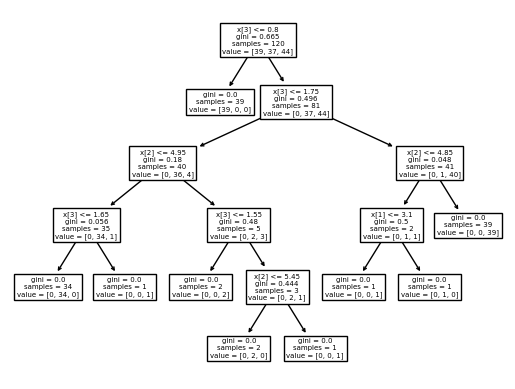

In [35]:
tree.plot_tree(dtc);

In [36]:
# Generating the decision tree graph
dot_data = tree.export_graphviz(dtc, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph=gv.Source(dot_data)
graph.render("irisTree")

'irisTree.pdf'

In [37]:
# Predicting the test set results
y_pred= dtc.predict(X_test)
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [38]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [39]:
# Accuracy score
accuracy_score(y_test,y_pred)

1.0

## Multilayer Perceptron on Iris Dataset

In [40]:
# Create a neural network classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,),
                    max_iter=2000,
                    alpha=0.0001,
                    solver='adam',
                    verbose=10,
                    random_state=1,
                    learning_rate_init=.001)
mlp.fit(X_train, y_train)


Iteration 1, loss = 1.72296555
Iteration 2, loss = 1.64738292
Iteration 3, loss = 1.57589661
Iteration 4, loss = 1.50881962
Iteration 5, loss = 1.44676460
Iteration 6, loss = 1.39020113
Iteration 7, loss = 1.33956641
Iteration 8, loss = 1.29535122
Iteration 9, loss = 1.25766646
Iteration 10, loss = 1.22652953
Iteration 11, loss = 1.20150840
Iteration 12, loss = 1.18194723
Iteration 13, loss = 1.16686563
Iteration 14, loss = 1.15495332
Iteration 15, loss = 1.14492868
Iteration 16, loss = 1.13557390
Iteration 17, loss = 1.12593723
Iteration 18, loss = 1.11530584
Iteration 19, loss = 1.10332286
Iteration 20, loss = 1.08991886
Iteration 21, loss = 1.07520588
Iteration 22, loss = 1.05946362
Iteration 23, loss = 1.04307498
Iteration 24, loss = 1.02640856
Iteration 25, loss = 1.00984874
Iteration 26, loss = 0.99375872
Iteration 27, loss = 0.97834270
Iteration 28, loss = 0.96378953
Iteration 29, loss = 0.95017235
Iteration 30, loss = 0.93741114
Iteration 31, loss = 0.92542921
Iteration 32, los

MLPClassifier(max_iter=2000, random_state=1, verbose=10)

In [41]:
# Predict the labels of the test set
y_pred = mlp.predict(X_test)
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [42]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [43]:
# Accuracy score
accuracy_score(y_test,y_pred)

1.0

## Loading MNIST Dataset

In [44]:
mnist= load_digits()
# reshaping the data
n_samples = len(mnist.images)
data = mnist.images.reshape((n_samples, -1))

In [45]:
# Checking the shape of data
data.shape

(1797, 64)

## Visualize the first 4 images

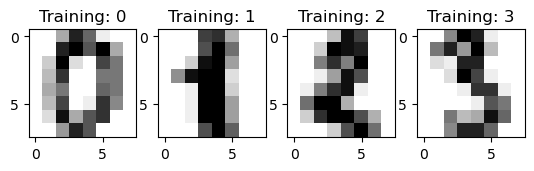

In [46]:
# Visualize the first 4 images
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(mnist.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % mnist.target[i])

## Split the dataset into training and testing sets

In [47]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, mnist.target, test_size=0.2, random_state=0)

In [48]:
# checking the shape of training and testing sets
X_train.shape, X_test.shape

((1437, 64), (360, 64))

## Decision Tree on MNIST Dataset

In [49]:
# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

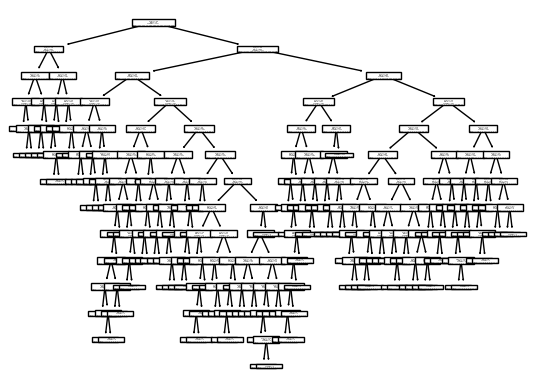

In [50]:
# Decision Tree Graph
tree.plot_tree(dtc);

In [51]:
# Generating the decision tree graph using graphviz
dot_data = tree.export_graphviz(dtc, out_file=None,
                                feature_names=mnist.feature_names,
                                class_names=mnist.target_names.astype(str),
                                filled=True, rounded=True,
                                special_characters=True)
graph=gv.Source(dot_data)
graph.render("mnistTree")

'mnistTree.pdf'

In [52]:
# Predicting the test set results
y_pred= dtc.predict(X_test)
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.91      0.83      0.87        35
           2       0.80      0.78      0.79        36
           3       0.72      0.79      0.75        29
           4       0.87      0.87      0.87        30
           5       0.81      0.85      0.83        40
           6       0.89      0.93      0.91        44
           7       0.90      0.95      0.92        39
           8       0.85      0.72      0.78        39
           9       0.79      0.80      0.80        41

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.84      0.84      0.84       360



In [53]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[23  0  0  0  0  1  1  0  0  2]
 [ 0 29  1  1  3  1  0  0  0  0]
 [ 1  0 28  2  0  0  2  0  2  1]
 [ 0  0  1 23  0  0  1  0  0  4]
 [ 1  0  0  0 26  1  1  1  0  0]
 [ 1  0  0  1  0 34  0  2  0  2]
 [ 0  0  1  1  1  0 41  0  0  0]
 [ 0  0  0  0  0  1  0 37  1  0]
 [ 1  3  4  1  0  1  0  1 28  0]
 [ 0  0  0  3  0  3  0  0  2 33]]


In [54]:
# Accuracy score
accuracy_score(y_test,y_pred)

0.8388888888888889

## Multilayer Perceptron on MNIST Dataset

In [55]:
# MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,),  
                    max_iter=1000,  
                    alpha=0.0001,  
                    solver='adam',  
                    verbose=10, 
                    random_state=1,
                    learning_rate_init=.001) 
mlp.fit(X_train, y_train)

Iteration 1, loss = 7.04868411
Iteration 2, loss = 3.61992529
Iteration 3, loss = 2.42967245
Iteration 4, loss = 1.46720291
Iteration 5, loss = 0.97282511
Iteration 6, loss = 0.68602584
Iteration 7, loss = 0.51837162
Iteration 8, loss = 0.41878389
Iteration 9, loss = 0.34950982
Iteration 10, loss = 0.30186663
Iteration 11, loss = 0.26085522
Iteration 12, loss = 0.23363782
Iteration 13, loss = 0.21103885
Iteration 14, loss = 0.19103088
Iteration 15, loss = 0.17549093
Iteration 16, loss = 0.16236423
Iteration 17, loss = 0.15099860
Iteration 18, loss = 0.13939363
Iteration 19, loss = 0.13517332
Iteration 20, loss = 0.12330939
Iteration 21, loss = 0.11462790
Iteration 22, loss = 0.10723420
Iteration 23, loss = 0.09898858
Iteration 24, loss = 0.09290463
Iteration 25, loss = 0.08775605
Iteration 26, loss = 0.08220588
Iteration 27, loss = 0.07664264
Iteration 28, loss = 0.07245086
Iteration 29, loss = 0.06805496
Iteration 30, loss = 0.06563299
Iteration 31, loss = 0.06164228
Iteration 32, los

MLPClassifier(max_iter=1000, random_state=1, verbose=10)

In [56]:
# Predict the labels of the test set
y_pred = mlp.predict(X_test)
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.92      0.97      0.94        35
           2       1.00      0.97      0.99        36
           3       0.94      1.00      0.97        29
           4       1.00      0.97      0.98        30
           5       1.00      0.97      0.99        40
           6       1.00      0.98      0.99        44
           7       0.95      1.00      0.97        39
           8       0.97      0.92      0.95        39
           9       0.98      0.98      0.98        41

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



In [57]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  1 35  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  2  0  0  0  0 36  0]
 [ 0  0  0  0  0  0  0  1  0 40]]


In [58]:
# Accuracy score
accuracy_score(y_test,y_pred)

0.975